In [7]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [8]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree1=DecisionTreeClassifier(criterion='entropy')
dtree1.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
from sklearn.tree import export_graphviz
from IPython.display import Image
def plotTree(dtree, imgfile, features, targets):
    export_graphviz(dtree, out_file=imgfile, feature_names = features,
                class_names = targets,
                rounded = True, proportion = False, precision = 2, filled = True)
    outfile=imgfile+".png"
    !dot -Tpng "$imgfile" -o "$outfile" -Gdpi=600
    Image(filename = outfile)
    


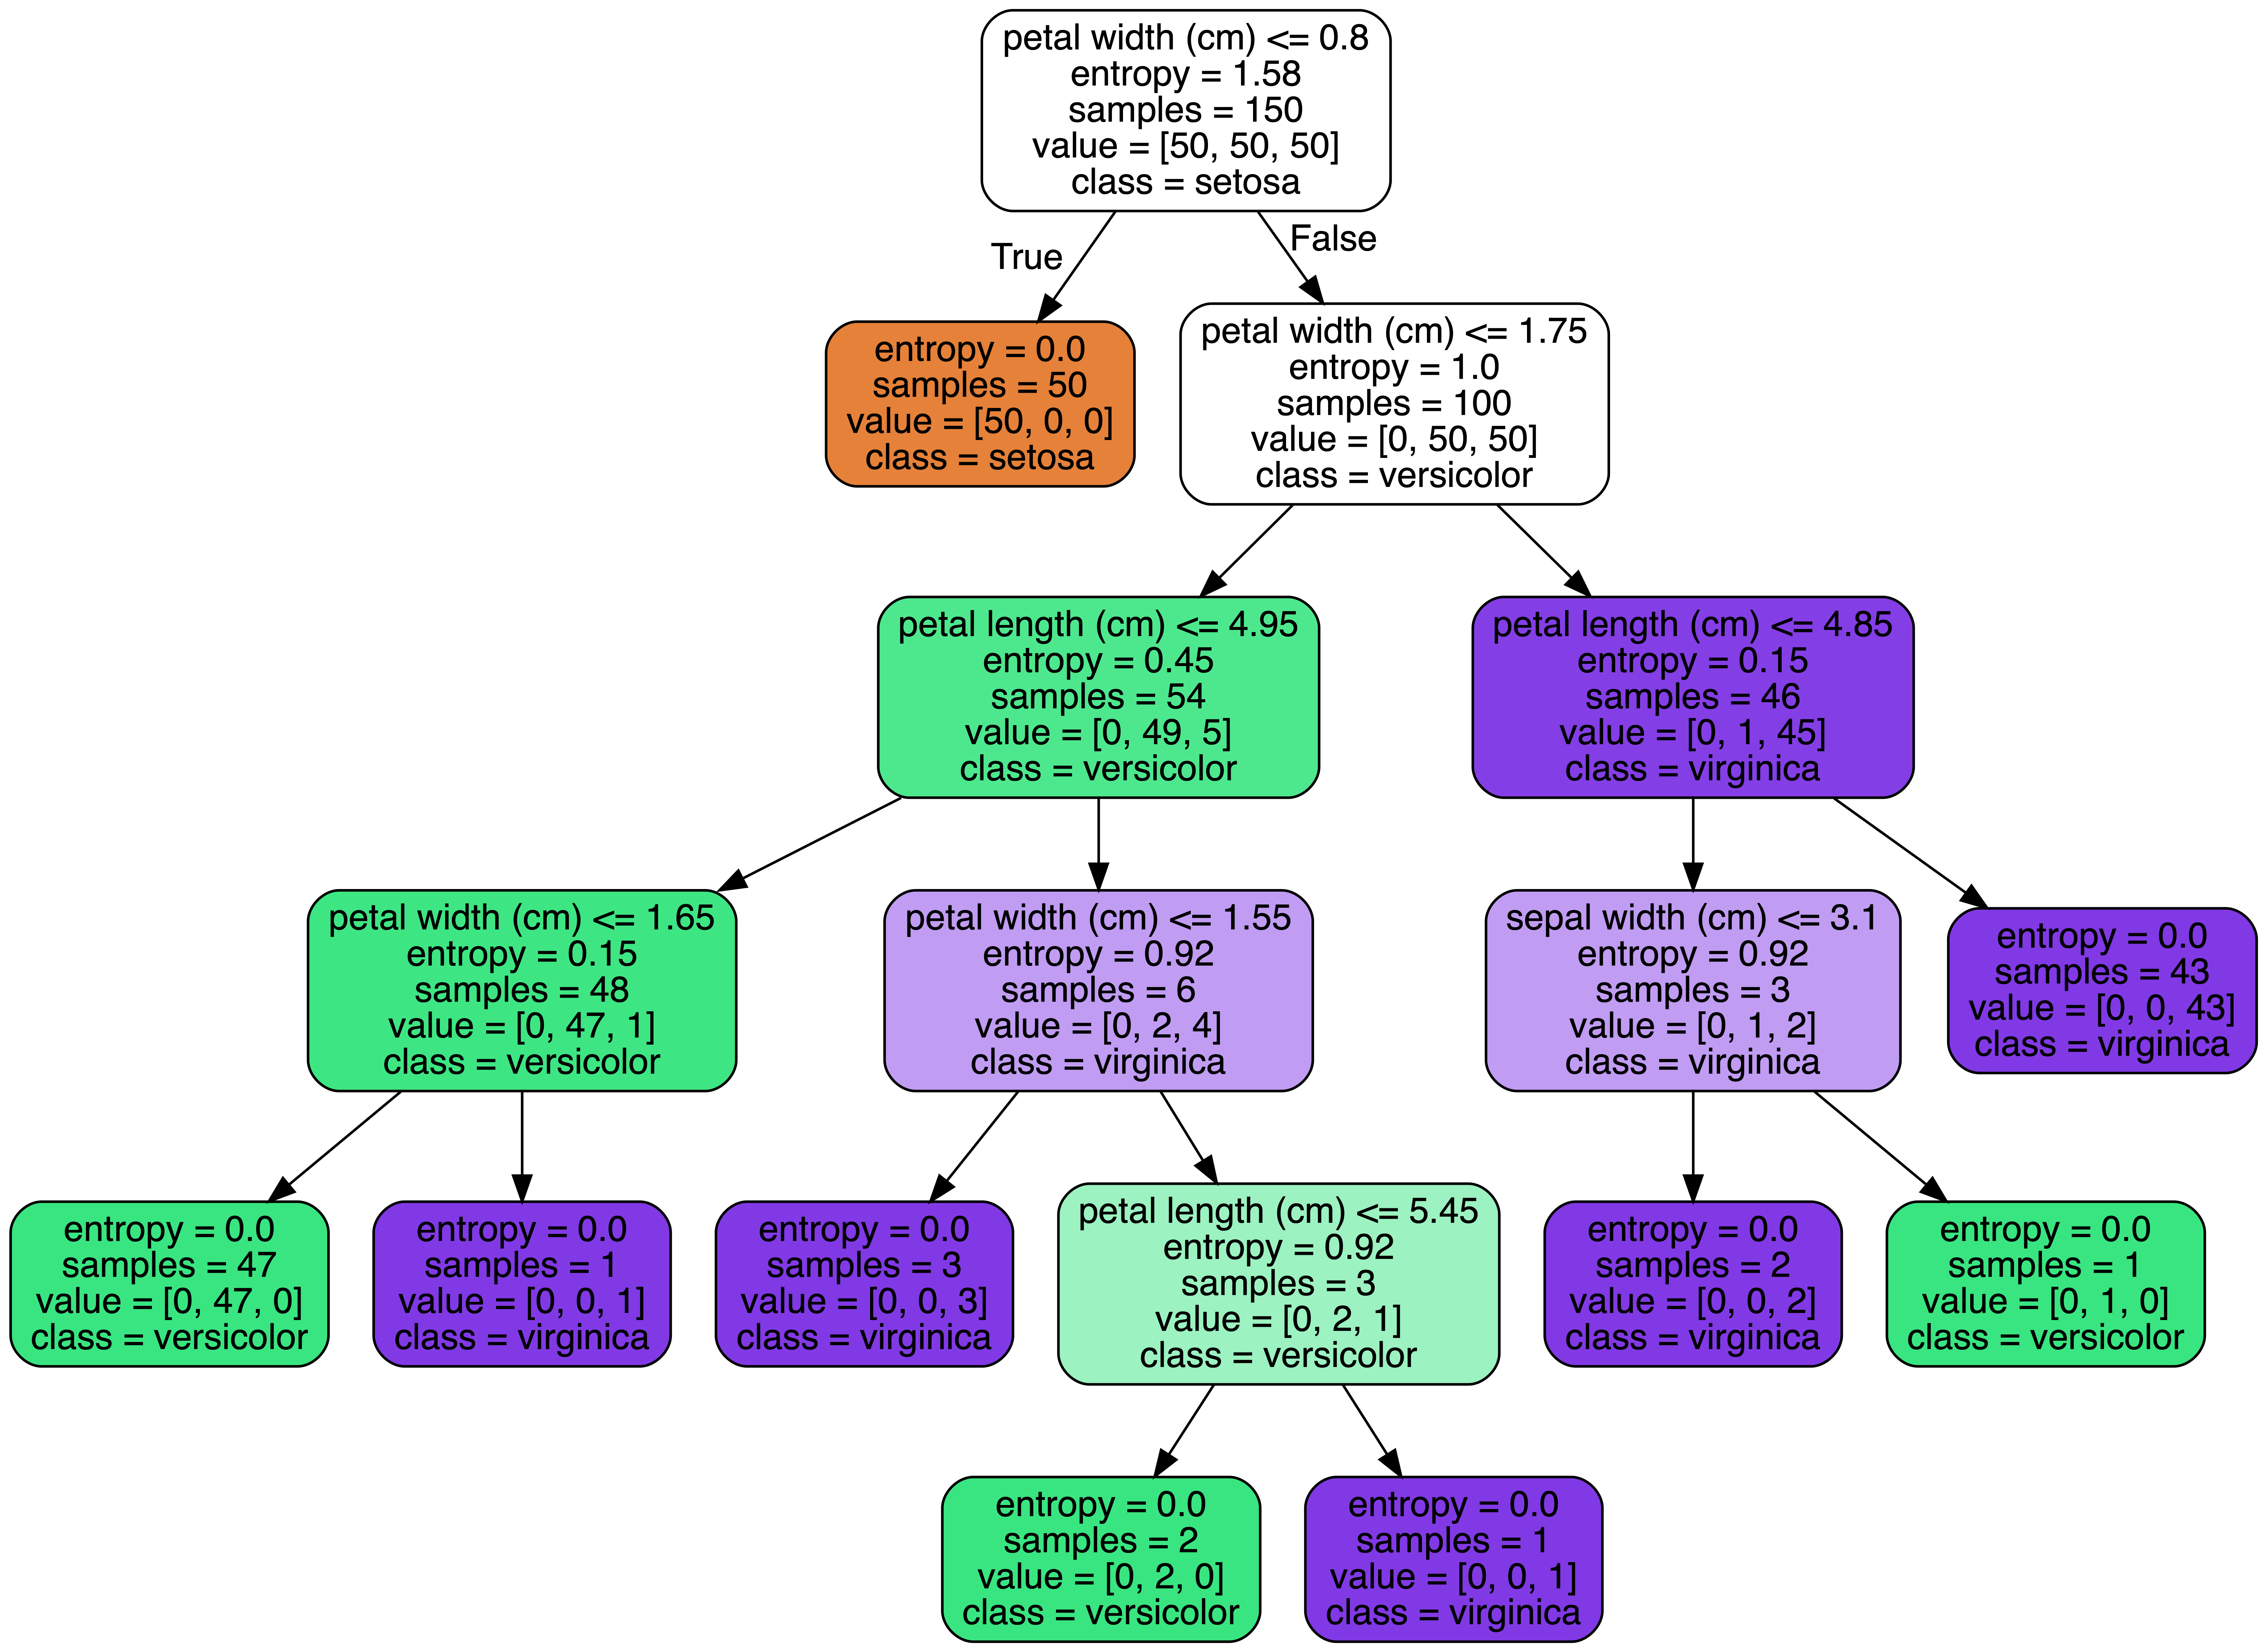

In [102]:
imgfile="iris.dot"
plotTree(dtree1, imgfile, iris.feature_names, iris.target_names)
Image(filename = imgfile+'.png')

In [142]:
cancerdata=datasets.load_breast_cancer()
dfcancer=pd.DataFrame(cancerdata.data, columns=cancerdata.feature_names)
ycancer=cancer.target

In [143]:
dfcancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [144]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(dfcancer,ycancer)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [223]:
import numpy as np
seed=0
np.random.seed(seed)
msk = np.random.rand(len(dfcancer)) < 0.8
train_x = dfcancer[msk]
train_y = cancer.target[msk]
test_x = dfcancer[~msk]
test_y = cancer.target[~msk]

In [224]:
len(train_x)

458

In [225]:
len(test_x)

111

In [254]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtmodel = dtree.fit(train_x, train_y)

In [255]:
y_pred = dtmodel.predict(test_x)

In [256]:
from sklearn.metrics import accuracy_score

In [257]:
accuracy_score(test_y, y_pred)

0.9279279279279279

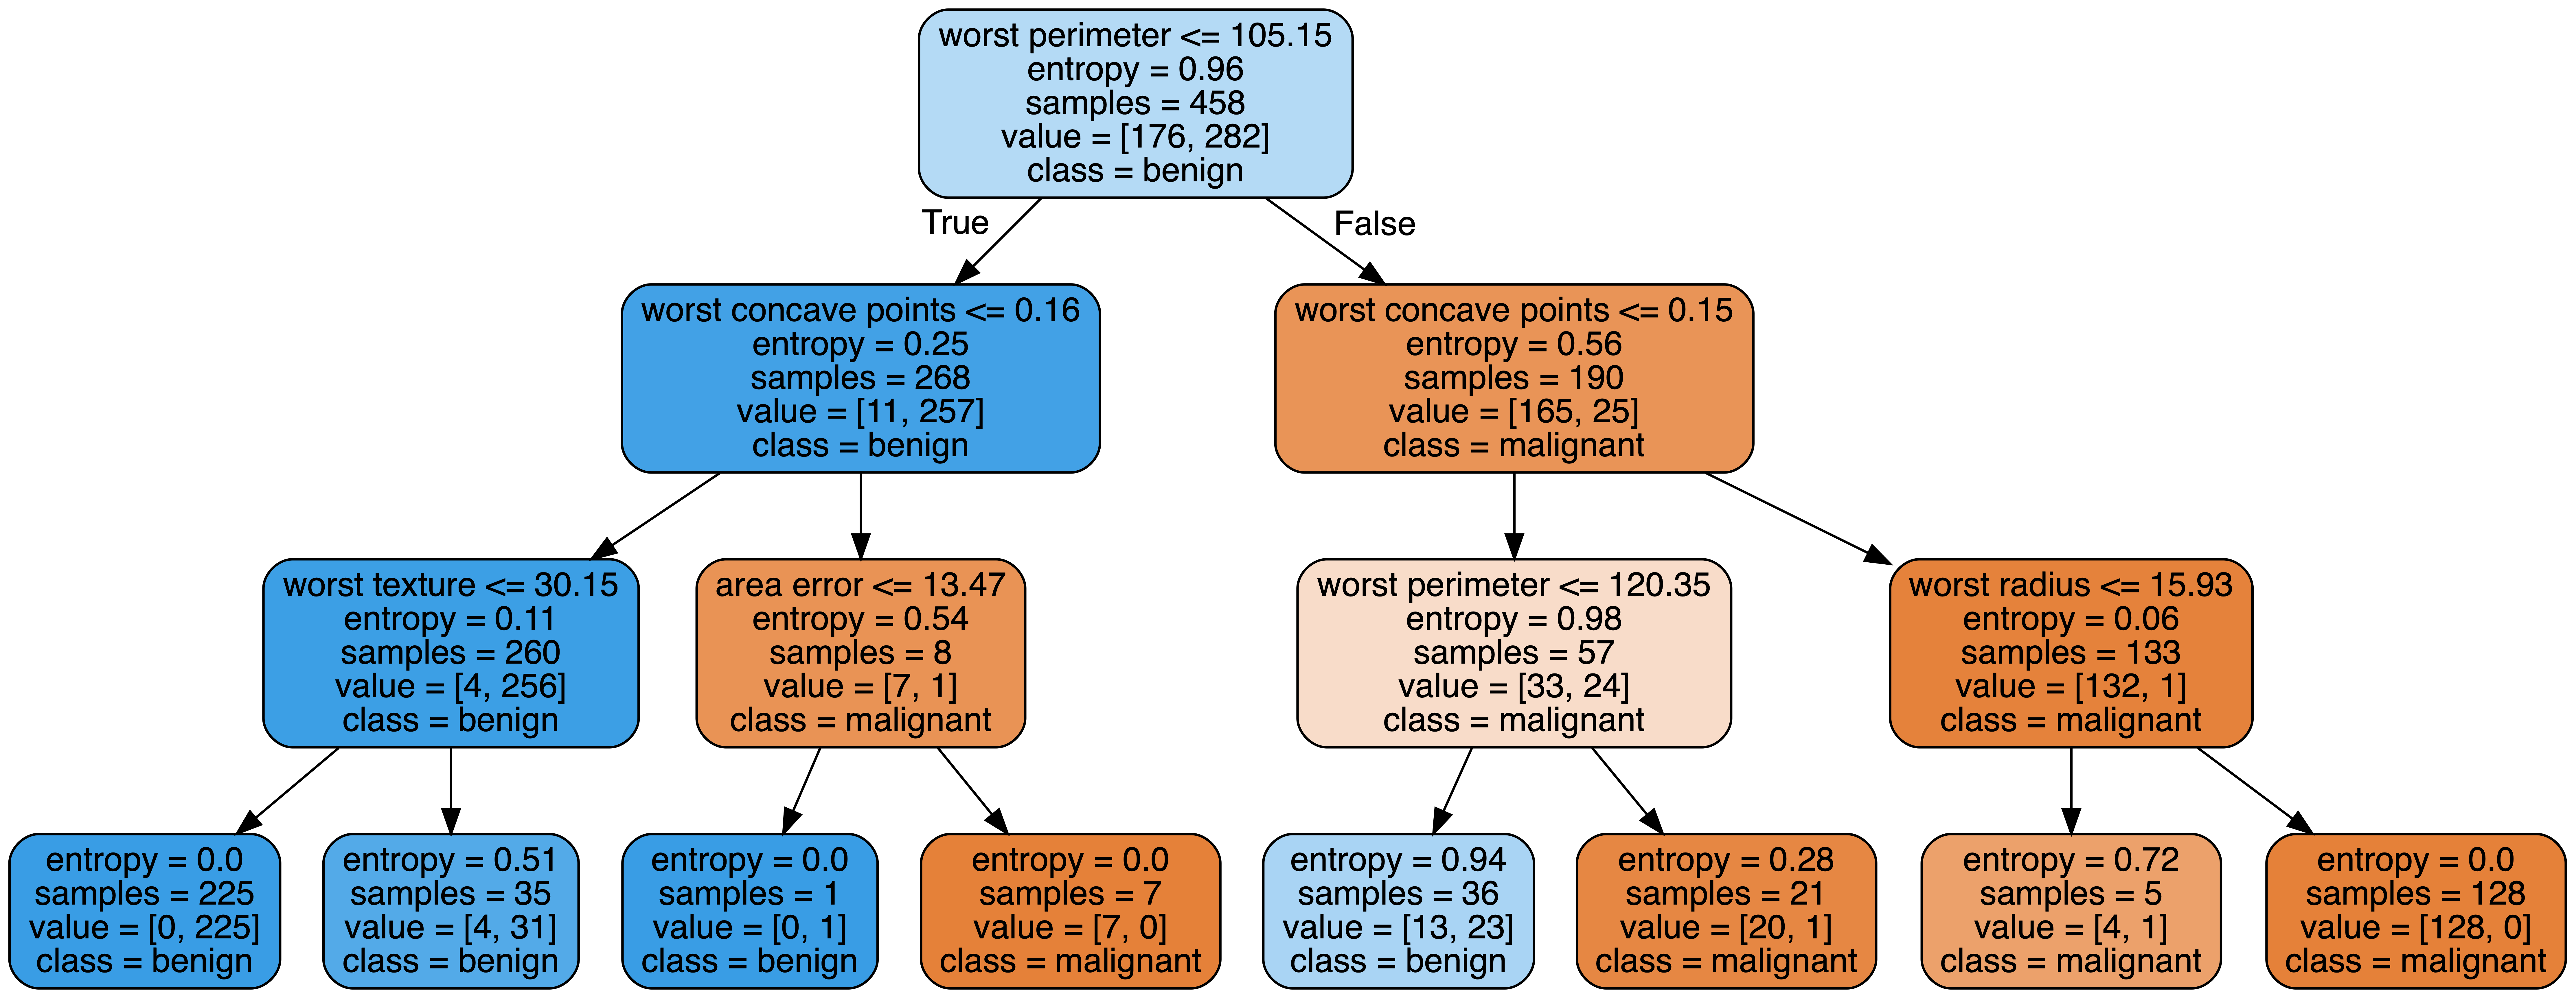

In [258]:
imgfile="cancer.dot"
plotTree(dtree, imgfile, cancerdata.feature_names, cancerdata.target_names)
Image(filename = imgfile+'.png')

In [238]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, cancerdata.data, cancerdata.target, cv=10)

array([0.93103448, 0.82758621, 0.9122807 , 0.87719298, 0.98245614,
       0.96491228, 0.94736842, 0.98214286, 0.94642857, 0.96428571])

In [240]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [241]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [242]:
(TP + TN)/(TP+ TN + FP + FN)

0.9279279279279279

In [249]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(test_y, y_pred)

AUC: 0.944


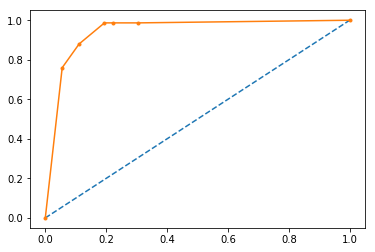

In [259]:
from matplotlib import pyplot
probs = dtree.predict_proba(test_x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(test_y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_y, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [261]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.05555556 0.11111111 0.19444444 0.22222222 0.30555556
 1.        ]
[0.         0.76       0.88       0.98666667 0.98666667 0.98666667
 1.        ]
[2.         1.         0.88571429 0.63888889 0.2        0.04761905
 0.        ]
